In [2]:
import pandas as pd

fish = pd.read_csv('data/Fish.csv')

In [18]:
fish_input = fish[['Weight', 'Length2', 'Length3', 'Width']]
fish_target = fish[['Species']]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
ss.fit(test_input)
test_scaled = ss.transform(test_input)

In [22]:
# 확률적 경사하강법을 사용한 분류 작업
# loss 어떤 손실 함수를 쓸지, max_iter 반복수 (기본 1000회)
from sklearn.linear_model import SGDClassifier

In [23]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [26]:
sc.score(train_scaled, train_target)

0.8151260504201681

In [25]:
sc.score(test_scaled, test_target)

0.875

In [27]:
sc.partial_fit(train_scaled, train_target) # 방금 학습한 거에 이어서 새로운 학습을 진행한다
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.875


C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# 에포크(반복)가 실행될 때마다 score 저장하기

import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [30]:
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

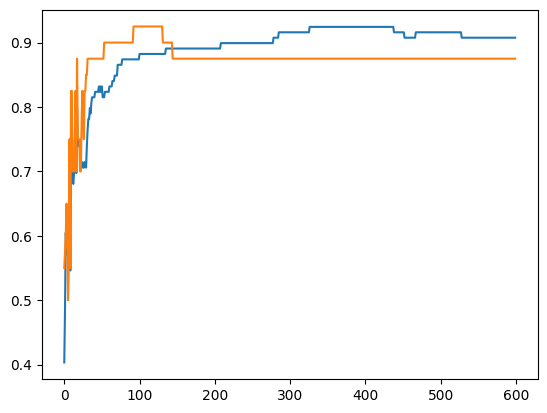

In [32]:
import matplotlib.pyplot as plt
# x축은 반복수, y축은 점수
plt.plot(train_score)
plt.plot(test_score)
plt.show()